# Task Assignment (For Notebook 12)
1. Eyeballing the average evoked responses, where in time and space would you think a difference could be observed? 
2. Try the same analysis procedure, but contrast "left" vs "right" hemifield
3. Do other classifiers perform better? 

In [69]:
import numpy as np
import mne

import matplotlib.pyplot as plt
import importlib
importlib.reload(plt)

%matplotlib inline

In [70]:
# load data
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_filt-0-40_raw.fif')

raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)

Opening raw data file /home/ucloud/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


In [71]:
# filter to only include relevant data 
raw = raw.pick_types(meg=True, stim=True)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | Average EEG reference, active : False, n_channels : 60>


Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.1s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


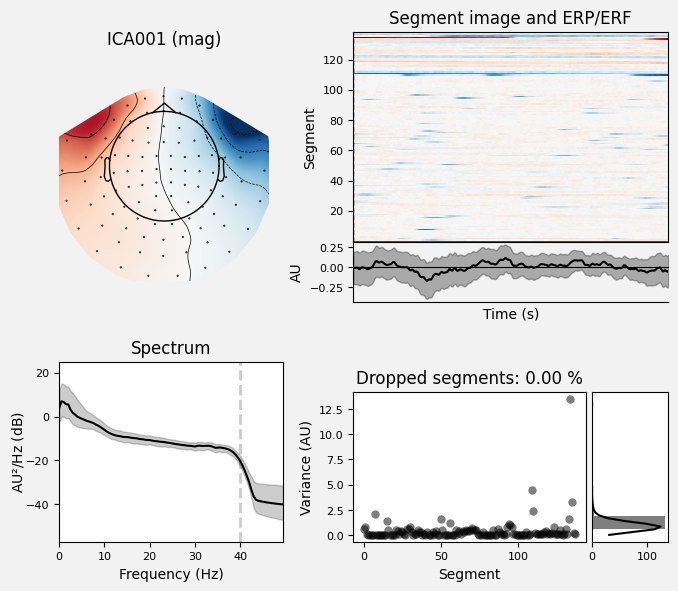

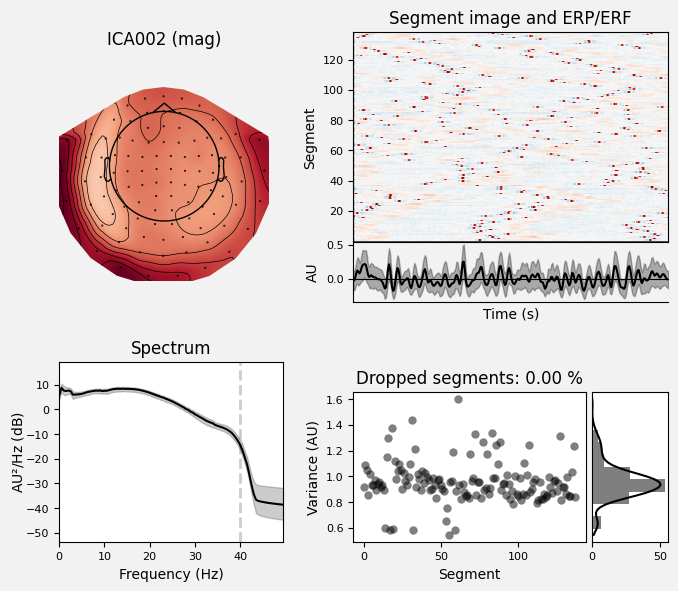

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [72]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [73]:
# apply ica
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 305 PCA components


<Raw | sample_audvis_filt-0-40_raw.fif, 314 x 41700 (277.7 s), ~103.1 MB, data loaded>

In [74]:
# detect events
events = mne.find_events(raw, stim_channel='STI 014')

319 events found
Event IDs: [ 1  2  3  4  5 32]


In [75]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

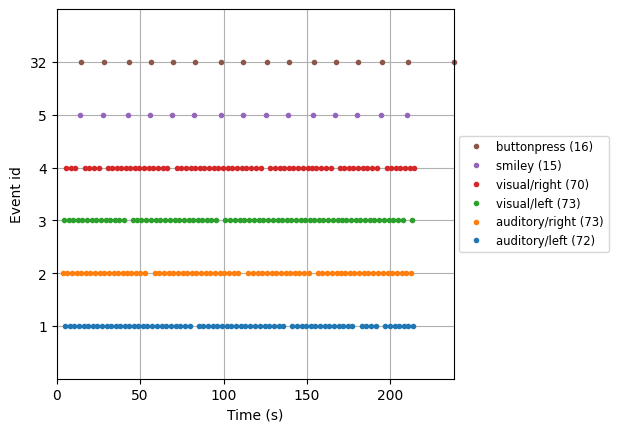

In [76]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [77]:
#Rejecting MEG epochs with signal above 4000 femtotesla
reject_criteria = dict(mag=4000e-15,     # 4000 fT
                       grad=4000e-13)    # 4000 fT/cm)

In [78]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 319 events and 106 original time points ...
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on MAG : ['MEG 1711']
2 bad epochs dropped


In [79]:
conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']

Dropped 6 epochs: 0, 1, 14, 16, 18, 230


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Multiple channel types selected, returning one figure per type.
combining channels using "gfp"
combining channels using "gfp"


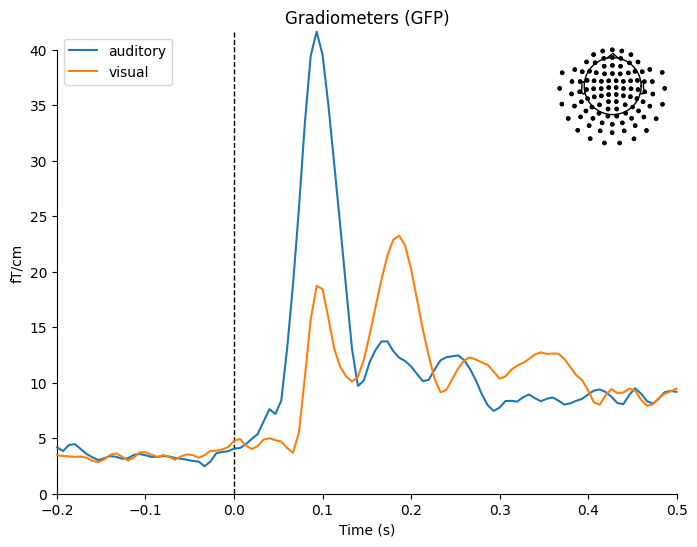

combining channels using "gfp"
combining channels using "gfp"


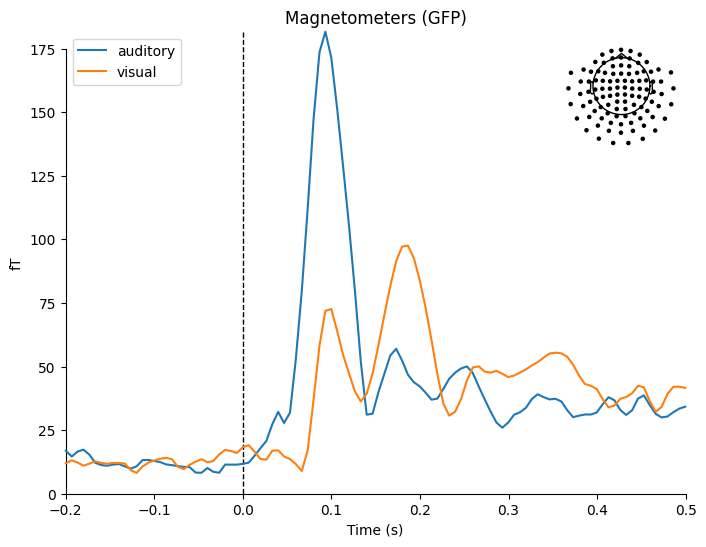

In [80]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                             legend='upper left', show_sensors='upper right');

We observe a difference in time at around 0.1 and 0.2 and 0.3

Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


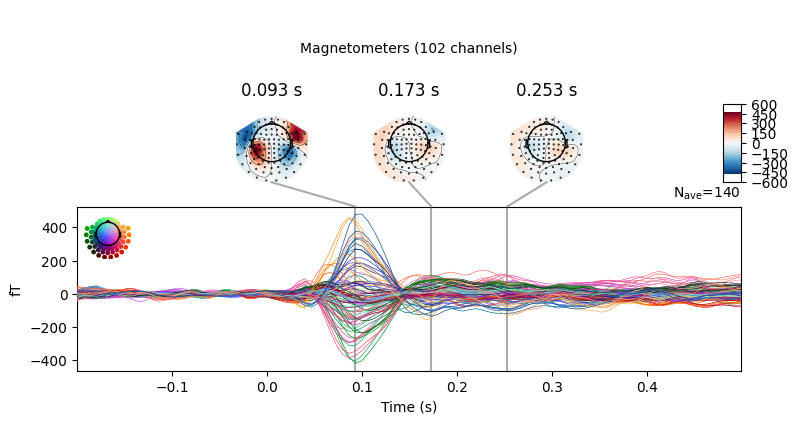

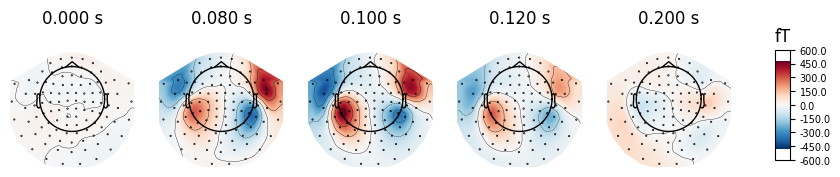

In [81]:
aud_evoked.plot_joint(picks='mag');
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='mag');

Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


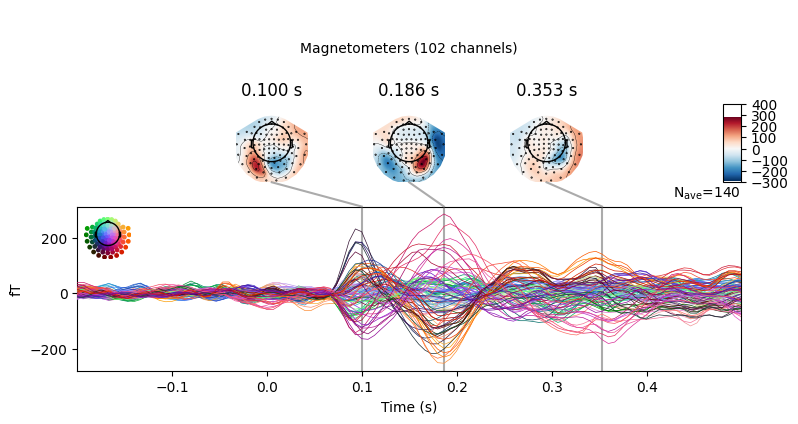

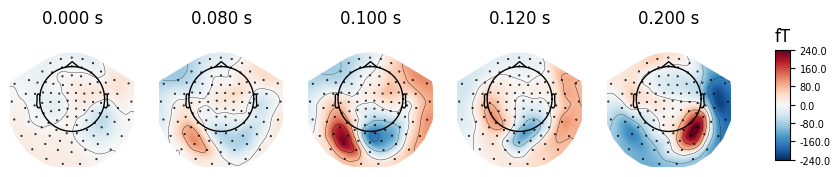

In [82]:
vis_evoked.plot_joint(picks='mag');
vis_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='mag');

We observe a difference in the back head (meme)

### Task 2 

In [83]:
# select epochs and average
aud_left = epochs["auditory/left"].average()
aud_right = epochs["auditory/right"].average()

vis_left = epochs["visual/left"].average()
vis_right = epochs["visual/right"].average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


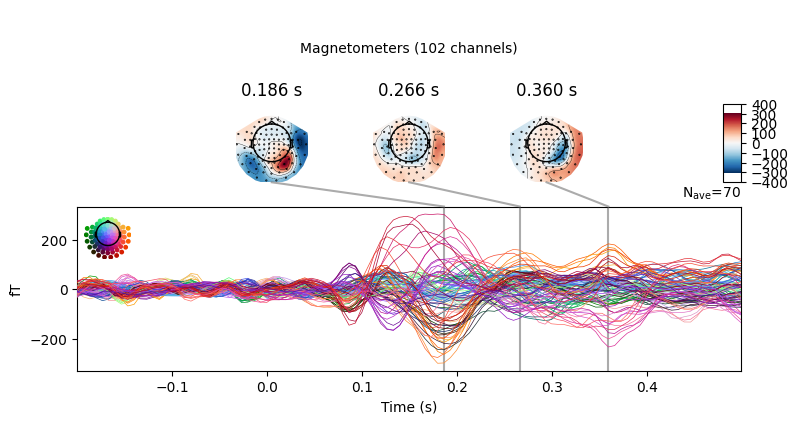

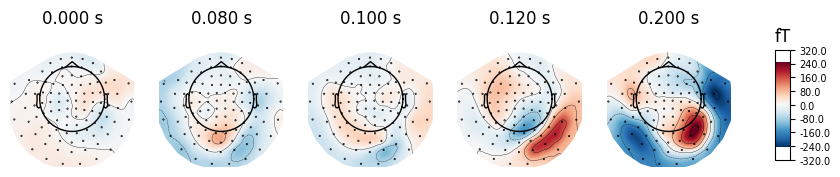

In [84]:
vis_left.plot_joint(picks='mag');
vis_left.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='mag');

Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


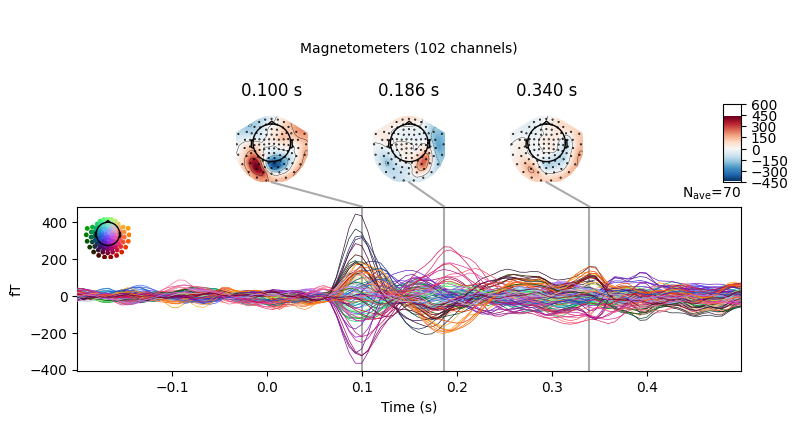

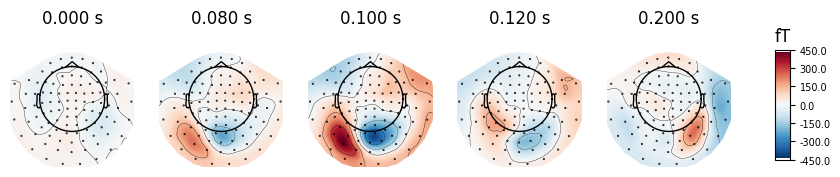

In [85]:
vis_right.plot_joint(picks='mag');
vis_right.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='mag');

Multiple channel types selected, returning one figure per type.
combining channels using "gfp"
combining channels using "gfp"


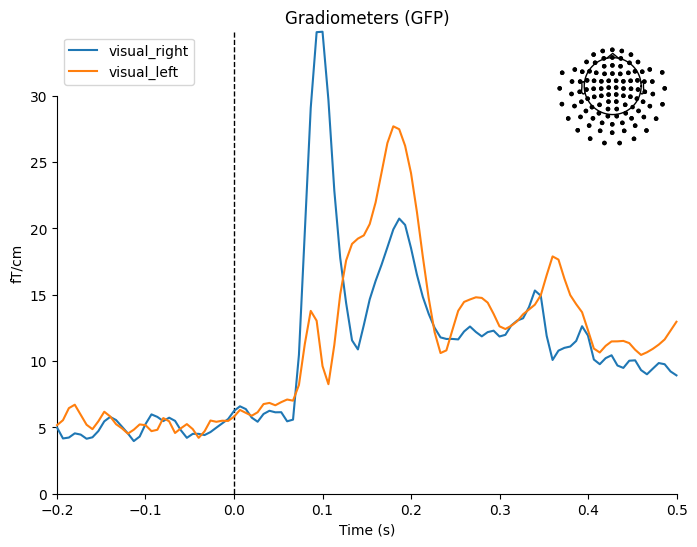

combining channels using "gfp"
combining channels using "gfp"


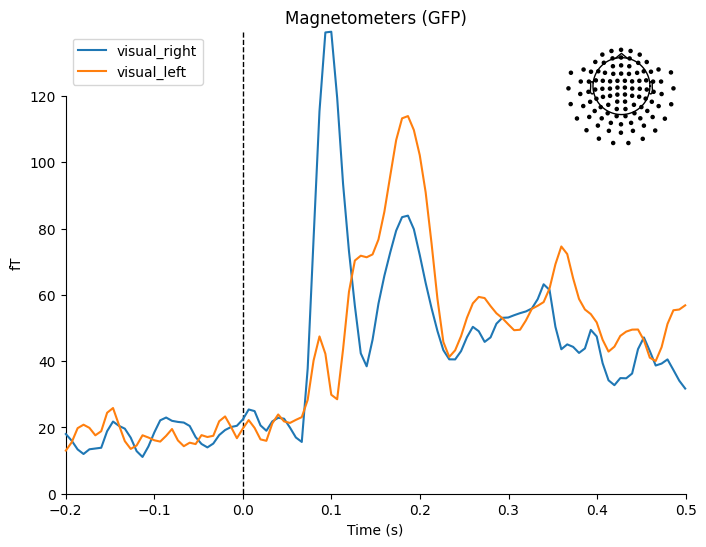

In [86]:
mne.viz.plot_compare_evokeds(dict(visual_right=vis_right, visual_left=vis_left),
                             legend='upper left', show_sensors='upper right');

Multiple channel types selected, returning one figure per type.
combining channels using "gfp"
combining channels using "gfp"


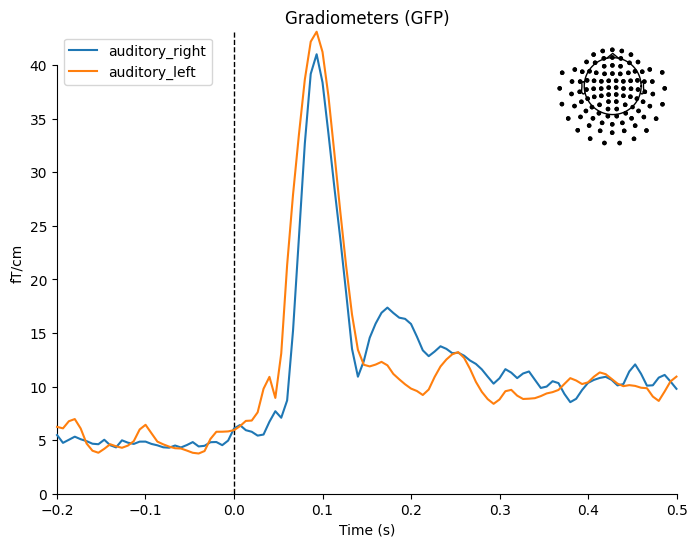

combining channels using "gfp"
combining channels using "gfp"


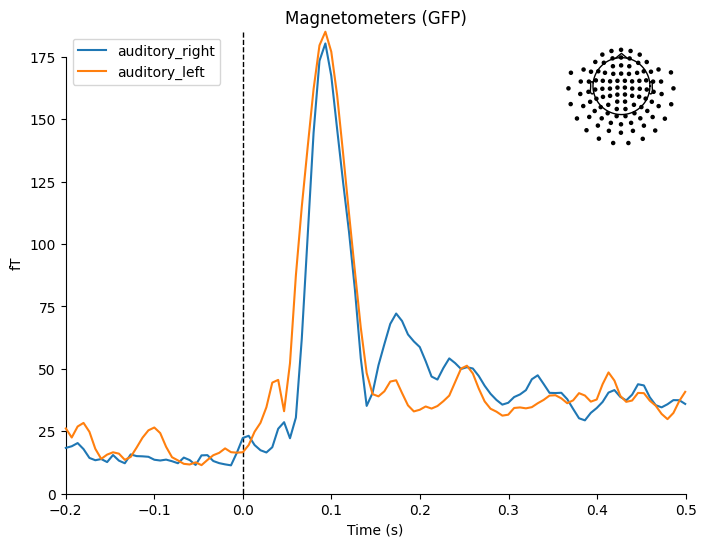

In [87]:
mne.viz.plot_compare_evokeds(dict(auditory_right=aud_right, auditory_left=aud_left),
                             legend='upper left', show_sensors='upper right');